## Import Dependencies

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
dir_data = './data'

name_input = 'train-volume.tif'
name_label = 'train-labels.tif'

img_input = Image.open(os.path.join(dir_data, name_input))
img_label = Image.open(os.path.join(dir_data, name_label))

ny, nx = img_label.size
nframes = img_label.n_frames

In [3]:
print(ny, nx)
print(nframes)

512 512
30


## Split Train, Validation, Test Dataset

In [4]:
# Train, Validation, Test ratio = 8:1:1(24, 3, 3). Total 30
nframe_train = 24
nframe_val = 3
nframe_test = 3

In [5]:
dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

if not os.path.exists(dir_save_train):
    os.makedirs(dir_save_train)
    
if not os.path.exists(dir_save_val):
    os.makedirs(dir_save_val)
    
if not os.path.exists(dir_save_test):
    os.makedirs(dir_save_test)

In [6]:
id_frame = np.arange(nframes)
np.random.shuffle(id_frame)

id_frame

array([ 2, 13, 24, 16, 25, 18, 27, 14, 29, 21, 28,  7, 22,  6,  3,  8, 26,
        5, 15,  1, 19, 11, 10, 23,  9, 20, 17,  0, 12,  4])

In [13]:
offset_nframe = 0

for i in range(nframe_train):
    img_input.seek(id_frame[i + offset_nframe])
    img_label.seek(id_frame[i + offset_nframe])
    
    input_ = np.asarray(img_input)
    label_ = np.asarray(img_label)
    
    np.save(os.path.join(dir_save_train, f'input_{i:>03}'), input_)
    np.save(os.path.join(dir_save_train, f'label_{i:>03}'), label_)

In [14]:
offset_nframe += nframe_train

for i in range(nframe_val):
    img_input.seek(id_frame[i + offset_nframe])
    img_label.seek(id_frame[i + offset_nframe])
    
    input_ = np.asarray(img_input)
    label_ = np.asarray(img_label)
    
    np.save(os.path.join(dir_save_val, f'input_{i:>03}'), input_)
    np.save(os.path.join(dir_save_val, f'label_{i:>03}'), label_)=

In [15]:
offset_nframe += nframe_val

for i in range(nframe_test):
    img_input.seek(id_frame[i + offset_nframe])
    img_label.seek(id_frame[i + offset_nframe])
    
    input_ = np.asarray(img_input)
    label_ = np.asarray(img_label)
    
    np.save(os.path.join(dir_save_test, f'input_{i:>03}'), input_)
    np.save(os.path.join(dir_save_test, f'label_{i:>03}'), label_)

## Show plot

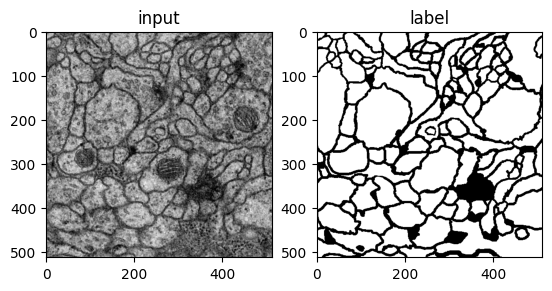

In [16]:
plt.subplot(121)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.subplot(122)
plt.imshow(label_, cmap='gray')
plt.title('label')
plt.show()

Label에서 검은 부분은 0, 하얀 부분은 255로 정의